# Harnessing the power of ML in diabetes prediction

In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split as tts,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
!pip install -q xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read the csv file
df = pd.read_csv("D:/datasets/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
# Display first 5 rows of the data
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# dimension of the dataset
df.shape

(100000, 9)

In [7]:
# Features and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Data Pre-processing

In [8]:
# Checking for duplicate records
df.duplicated().sum()

3854

In [9]:
# Removing duplicate records
DF = df.drop_duplicates(keep='first')
DF.shape

(96146, 9)

In [10]:
# Checking for missing values
DF.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Exploratory Data Analyis (EDA)

In [11]:
# Summary Statistics of the dataset
DF.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


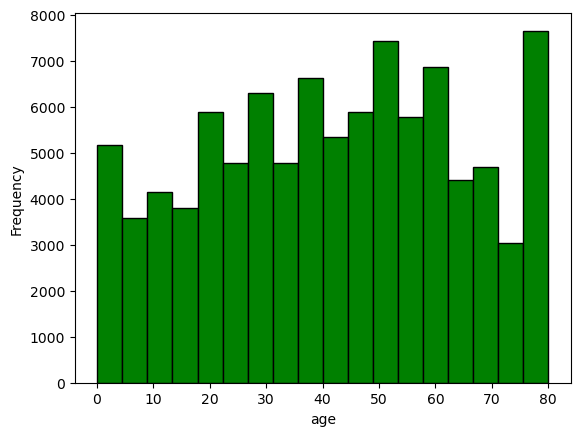

In [12]:
# Visualising the distribution ofnumerical features through histogram
# age
plt.hist(DF['age'], bins=18, color='green', edgecolor='black')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

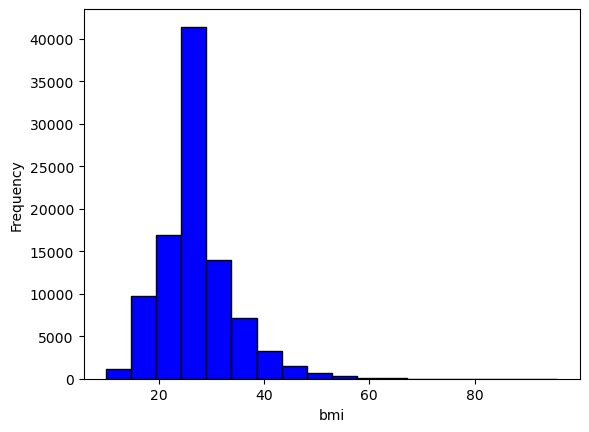

In [13]:
# bmi
plt.hist(DF['bmi'], bins=18, color='blue', edgecolor='black')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

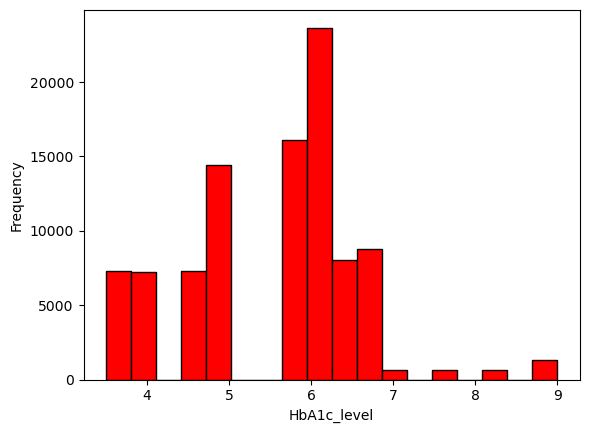

In [14]:
# HbA1c_level
plt.hist(DF['HbA1c_level'], bins=18, color='red', edgecolor='black')
plt.xlabel('HbA1c_level')
plt.ylabel('Frequency')
plt.show()

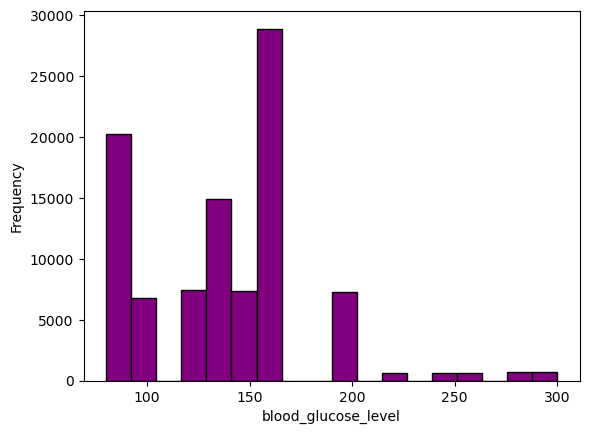

In [15]:
# blood_glucose_level
plt.hist(DF['blood_glucose_level'], bins=18, color='purple', edgecolor='black')
plt.xlabel('blood_glucose_level')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Visualising the categorical variables through Countplot
# gender
DF['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

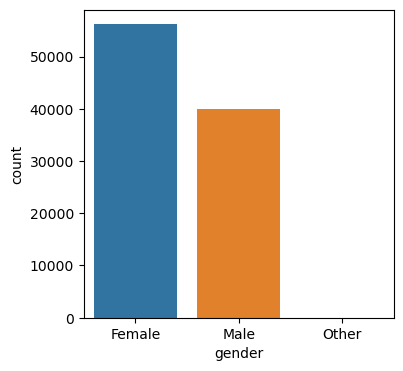

In [17]:
plt.figure(figsize = (4,4))
sns.countplot(x='gender', data=DF)
plt.show()

In [18]:
# hypertension
DF['hypertension'].value_counts()

0    88685
1     7461
Name: hypertension, dtype: int64

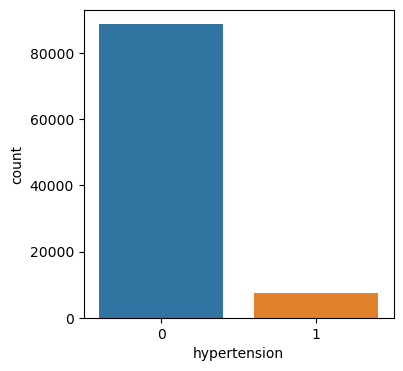

In [19]:
plt.figure(figsize = (4,4))
sns.countplot(x='hypertension', data=DF)
plt.show()

In [20]:
# heart_disease
DF['heart_disease'].value_counts()

0    92223
1     3923
Name: heart_disease, dtype: int64

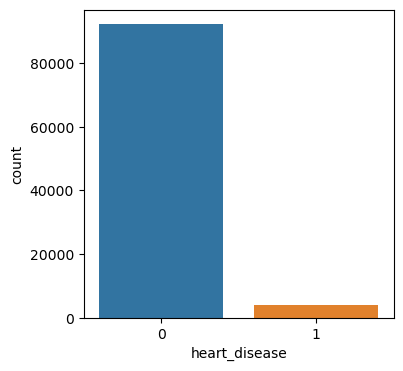

In [21]:
plt.figure(figsize = (4,4))
sns.countplot(x='heart_disease', data=DF)
plt.show()

In [22]:
# smoking_history
DF['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

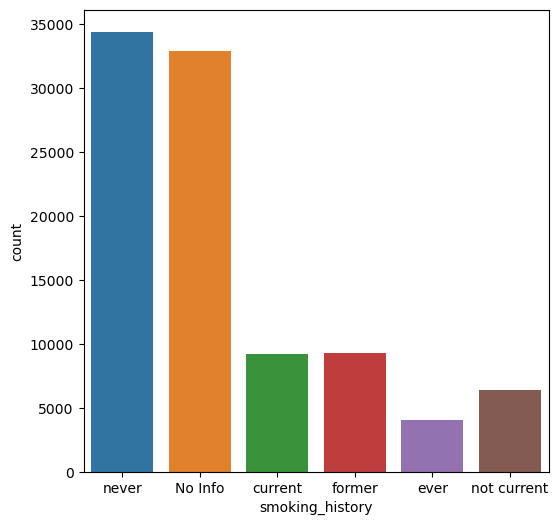

In [23]:
plt.figure(figsize = (6,6))
sns.countplot(x='smoking_history', data=DF)
plt.show()

In [24]:
# diabetes
DF['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

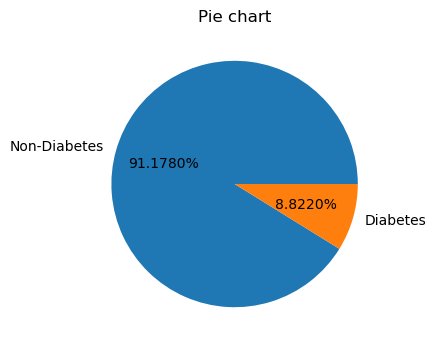

In [25]:
# Visualising target variable through piechart
diab = DF['diabetes'].value_counts()
plt.figure(figsize = (6,4))
plt.pie(diab,labels = ['Non-Diabetes','Diabetes'],autopct = '%.4f%%')
plt.title('Pie chart')
plt.show()

In [26]:
# Count of diabetic and non-diabetic individuals by gender
diabetes_count_by_gender = DF.groupby(['gender', 'diabetes']).size().unstack(fill_value=0)
print(diabetes_count_by_gender)

diabetes      0     1
gender               
Female    51714  4447
Male      35932  4035
Other        18     0


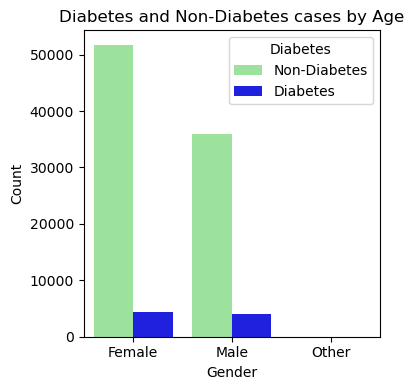

In [27]:
# Visualising through countplot
plt.figure(figsize=(4,4))
sns.countplot(x='gender', hue='diabetes', data=DF, palette=['lightgreen', 'blue'])
plt.title('Diabetes and Non-Diabetes cases by Age')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['Non-Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

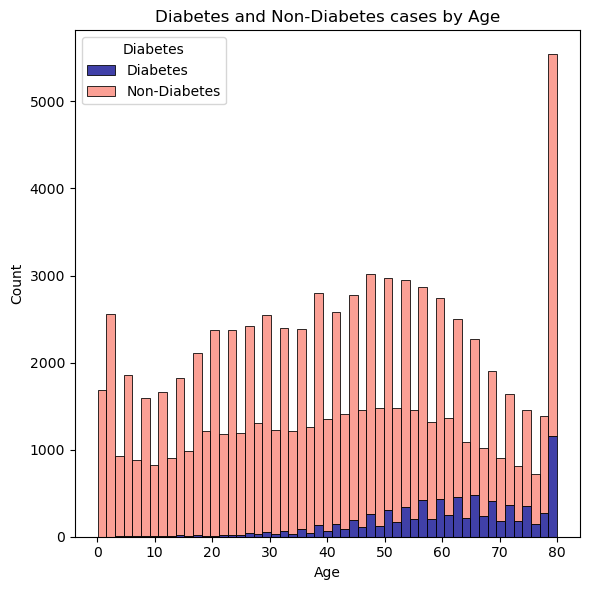

In [28]:
# Visualising Diabetic and non-diabetic individuals by Age through histogram
plt.figure(figsize=(6,6))
sns.histplot(data=DF, x='age', hue='diabetes', multiple='stack', palette=['salmon', 'darkblue'])
plt.title('Diabetes and Non-Diabetes cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['Diabetes', 'Non-Diabetes'])
plt.tight_layout()
plt.show()

# Outlier Detection

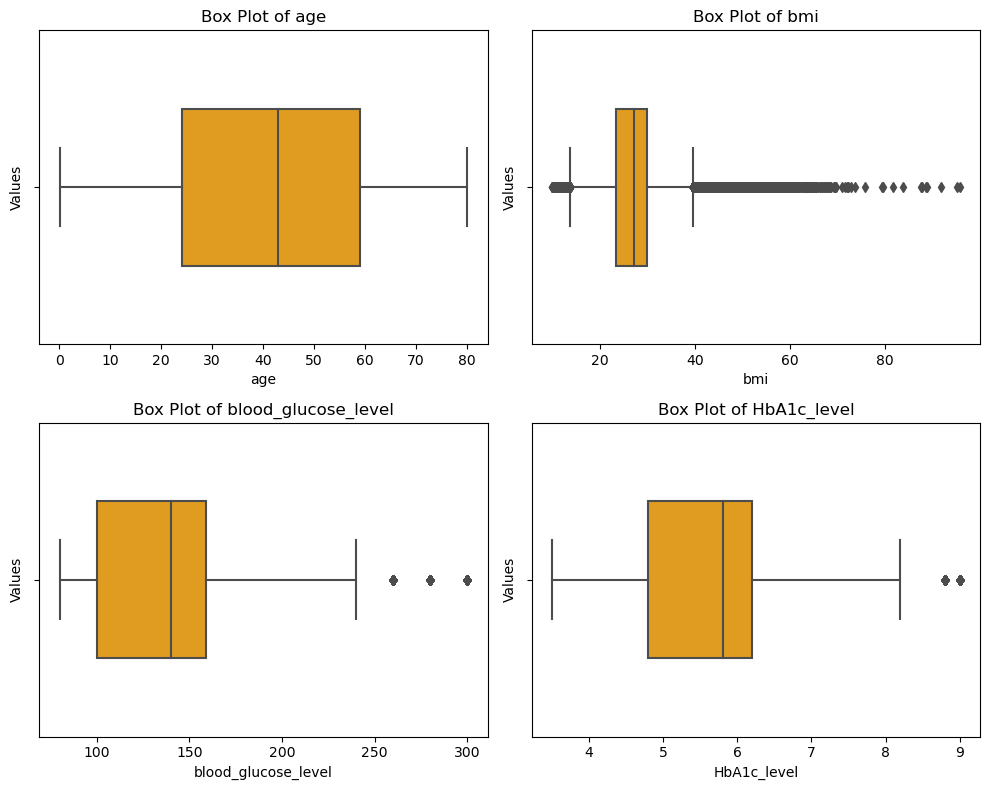

In [29]:
# Box plot for numerical features to identify outliers
features = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes = axes.flatten()
# Create box plots for each numerical feature
for i, feature in enumerate(features):
    sns.boxplot(x=feature, data=DF, ax=axes[i], width=0.5, linewidth=1.5, color='orange')
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')
plt.tight_layout()
plt.show()

In [30]:
# Observations from box plots
print('''We observed that features such as bmi , blood-glucose_level and Hba1c_level has potential outliers.So we will remove them 
by IQR method as outliers may significantly affect the results of statistical analyis and the model.''')

We observed that features such as bmi , blood-glucose_level and Hba1c_level has potential outliers.So we will remove them 
by IQR method as outliers may significantly affect the results of statistical analyis and the model.


In [31]:
# Removing outliers by IQR method
def remove_outliers(DF, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    DF_1 = DF[(DF[col] >= lower_bound) & (DF[col] <= upper_bound)]
    return DF_1
# List of numerical features
features = ['bmi','blood_glucose_level', 'HbA1c_level']
# Remove outliers for each numerical feature
for f in features:
    new_df = remove_outliers(DF, f)

In [32]:
# Shape of the cleaned data
new_df.shape

(94834, 9)

# Feature Engineering

In [33]:
# Categorical encoding
# Converting categorical features to numerical features by label encoding
label_encoded = LabelEncoder()
new_df['gender_encoded'] = label_encoded.fit_transform(new_df['gender'])
new_df['smoking_history_encoded'] = label_encoded.fit_transform(new_df['smoking_history'])
new_df.drop(columns=['gender','smoking_history'],inplace = True)

In [34]:
# first 5 rows after categorical encoding
new_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,80.0,0,1,25.19,6.6,140,0,0,4
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,4
3,36.0,0,0,23.45,5.0,155,0,0,1
4,76.0,1,1,20.14,4.8,155,0,1,1


<Axes: >

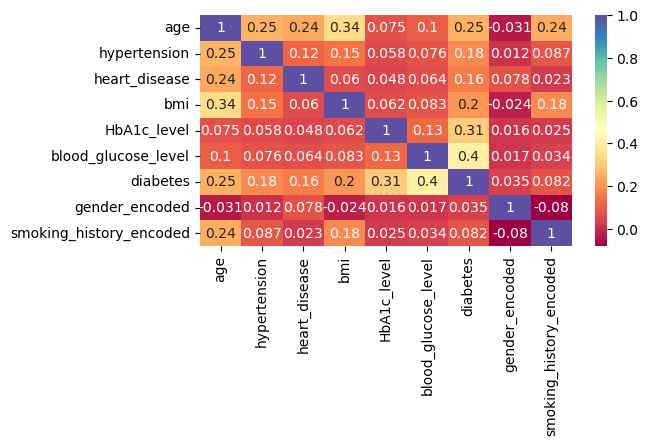

In [35]:
# Correlation Analysis through heatmap
plt.figure(figsize=(6,3))
sns.heatmap(new_df.corr(),annot = True,cmap = 'Spectral')

In [36]:
# Observations
print('''From the heatmap: 

1) We observed that the target variable and the explanatory variables have a moderate positive relationships.
2) Also,variables such as age and bmi depicts a moderate positive correlation by 34%.''')

From the heatmap: 

1) We observed that the target variable and the explanatory variables have a moderate positive relationships.
2) Also,variables such as age and bmi depicts a moderate positive correlation by 34%.


In [37]:
# Features influencing the most for predicting diabetes based on above observations:
high_corr_ = new_df.corr()
high_corr_features = high_corr_.index[abs(high_corr_['diabetes'])>=0.2]
print(high_corr_features)

Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')


In [38]:
# Observations
print('''Based on the correlation analysis, we selected the features whose influence is more than the others in predicting diabetes
of individuals.The features and their +ve correlation percentage are as follows:''')
features = {'Feature':['age','bmi','HbA1c_level','blood_glucose_level'],
            'Corr_percent':[25,20,31,40]}
A = pd.DataFrame(features)
A

Based on the correlation analysis, we selected the features whose influence is more than the others in predicting diabetes
of individuals.The features and their +ve correlation percentage are as follows:


,Feature,Corr_percent
0,age,25
1,bmi,20
2,HbA1c_level,31
3,blood_glucose_level,40


In [39]:
# Feature Scaling
scaler = StandardScaler()
new_df['age_scaled'] = scaler.fit_transform(new_df[['age']])
new_df['bmi_scaled'] = scaler.fit_transform(new_df[['bmi']])
new_df['HbA1c_scaled'] = scaler.fit_transform(new_df[['HbA1c_level']])
new_df['blood_glucose_scaled'] = scaler.fit_transform(new_df[['blood_glucose_level']])
new_df.drop(columns = ['age','bmi','HbA1c_level','blood_glucose_level'],inplace = True)

In [40]:
# first 5 rows after feature scaling
new_df.head()

,hypertension,heart_disease,diabetes,gender_encoded,smoking_history_encoded,age_scaled,bmi_scaled,HbA1c_scaled,blood_glucose_scaled
0,0,1,0,0,4,1.714863,-0.307447,1.109198,0.063347
1,0,0,0,0,0,0.556010,0.008661,1.109198,-1.433325
2,0,0,0,1,4,-0.602843,0.008661,0.213053,0.512349
3,0,0,0,0,1,-0.246273,-0.565676,-0.483948,0.437516
4,1,1,0,1,1,1.536578,-1.056906,-0.683092,0.437516


In [41]:
# Separating independent and dependent variables
x  = new_df.drop(columns = 'diabetes')
y = new_df['diabetes']

# Handling class imbalances

In [42]:
# Handling imbalance classes by under sampling and over sampling through pipeline
# Hybrid sampling
!conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

^C


In [43]:
# Define the pipeline 
pipeline = Pipeline([('under sampling',RandomUnderSampler(sampling_strategy=0.11,random_state=42)),
                     ('over sampling',SMOTE(random_state=42))])  
x_sam,y_sam = pipeline.fit_resample(x,y)

In [44]:
# Class distribution after appling resampling techniques
y_sam.value_counts()

0    65181
1    65181
Name: diabetes, dtype: int64

In [45]:
print('Class distribution before applying Hybrid Sampling:',new_df['diabetes'].value_counts())
print('Class distribution after applying Hybrid Sampling:',y_sam.value_counts())

Class distribution before applying Hybrid Sampling: 0    87664
1     7170
Name: diabetes, dtype: int64
Class distribution after applying Hybrid Sampling: 0    65181
1    65181
Name: diabetes, dtype: int64


# Train Test Split

In [46]:
# Splitting into train and test data
x_sam_train,x_sam_test,y_sam_train,y_sam_test = tts(x_sam,y_sam,test_size = 0.25,random_state = 42)
x_sam_train.shape,x_sam_test.shape,y_sam_train.shape,y_sam_test.shape

((97771, 8), (32591, 8), (97771,), (32591,))

# Model Building and Evaluation :

# LOGISTIC REGRESSION

In [47]:
# Model Fitting
LR = LogisticRegression()
LR.fit(x_sam_train,y_sam_train)

LogisticRegression()

In [48]:
# Model Evaluation 
LR_pred = LR.predict(x_sam_test)
print("Training score:",LR.score(x_sam_train,y_sam_train))
print("Accuracy score:",accuracy_score(y_sam_test,LR_pred))

Training score: 0.8765789446768469
Accuracy score: 0.8745052315056304


In [49]:
# Confusion matrix and Classification report
print('Confusion matrix:\n',confusion_matrix(y_sam_test,LR_pred))
print('Classification report:\n ',classification_report(y_sam_test,LR_pred))

Confusion matrix:
 [[14209  2184]
 [ 1906 14292]]
Classification report:
                precision    recall  f1-score   support

           0       0.88      0.87      0.87     16393
           1       0.87      0.88      0.87     16198

    accuracy                           0.87     32591
   macro avg       0.87      0.87      0.87     32591
weighted avg       0.87      0.87      0.87     32591



AUC score: 0.8745517774244752


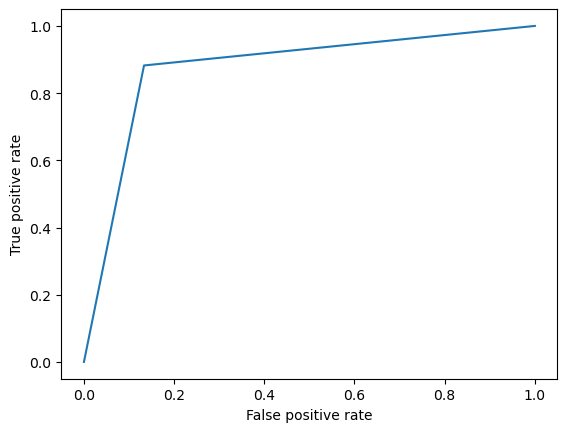

In [50]:
# AUC-ROC CURVE
fpr,tpr,thresholds = roc_curve(y_sam_test,LR_pred)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr,tpr)
print('AUC score:',roc_auc_score(y_sam_test,LR_pred))

# RANDOM FOREST

In [51]:
# Model Fitting
RFC = RandomForestClassifier(random_state = 42)
RFC.fit(x_sam_train,y_sam_train)

RandomForestClassifier(random_state=42)

In [50]:
# Model Evaluation
RFC_pred = RFC.predict(x_sam_test)
print('Training score:',RFC.score(x_sam_train,y_sam_train))

Training score: 0.999529512841231


In [52]:
# Since training score is 99.9% which implies overfitting we will use bagging technique to migitate overfitting issue
# Defining hyperparameters for random forest 
RF_par = {
    'n_estimators': 100,
    'max_depth': 7,
    'max_features': 'sqrt',
    'random_state': 42
}
# Base random forest classifier
BRFC = RandomForestClassifier(**RF_par)
# Defining hyperparameters for bagging
BG_par = {
    'base_estimator': BRFC,
    'n_estimators' : 10,
    'max_samples': 0.6,
    'random_state': 42
}
BGC = BaggingClassifier(**BG_par)

In [53]:
# Fit the model
BGC.fit(x_sam_train,y_sam_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                        random_state=42),
                  max_samples=0.6, random_state=42)

In [54]:
# Model Evaluation
RF_pred = BGC.predict(x_sam_test)
print('Training score:',BGC.score(x_sam_train,y_sam_train))
print('Accuracy score:',accuracy_score(y_sam_test,RF_pred))

Training score: 0.9103006003825265
Accuracy score: 0.9048510324936332


In [55]:
# Confusion matrix and classification report
print('Confusion matrix:\n',confusion_matrix(y_sam_test,RF_pred))
print('Classification report:\n ',classification_report(y_sam_test,RF_pred))

Confusion matrix:
 [[14290  2103]
 [  998 15200]]
Classification report:
                precision    recall  f1-score   support

           0       0.93      0.87      0.90     16393
           1       0.88      0.94      0.91     16198

    accuracy                           0.90     32591
   macro avg       0.91      0.91      0.90     32591
weighted avg       0.91      0.90      0.90     32591



AUC score: 0.9050504957534335


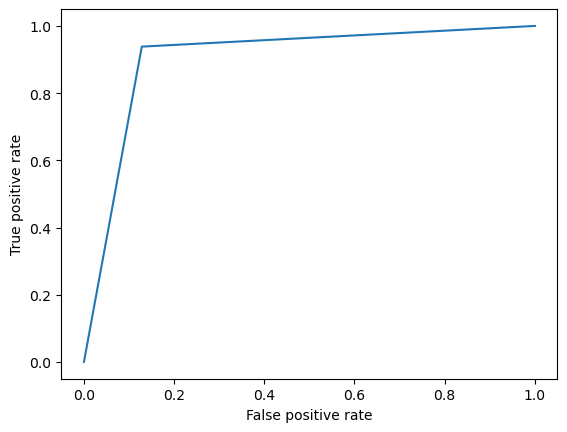

In [56]:
# AUC-ROC CURVE
fpr,tpr,thresholds = roc_curve(y_sam_test,RF_pred)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr,tpr)
print('AUC score:',roc_auc_score(y_sam_test,RF_pred))

# XGBOOST

In [57]:
# Model fitting
# Base learner is decision tree
XGB = XGBClassifier(learning_rate = 0.1,max_depth = 4,n_estimators = 100,subsample=0.87)
XGB.fit(x_sam_train,y_sam_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
# Cross validation
cv_scores = cross_val_score(XGB,x_sam_train,y_sam_train, cv=10, scoring='accuracy')
print('Average accuracy:',cv_scores.mean())

Average accuracy: 0.9521330382188375


In [59]:
# Model Evaluation
XGB_pred = XGB.predict(x_sam_test)
print("Training score:",XGB.score(x_sam_train,y_sam_train))
print("Accuracy score:",accuracy_score(y_sam_test,XGB_pred))

Training score: 0.9549150566118788
Accuracy score: 0.9532693074775245


In [62]:
# Confusion matrix and classification report
print('Confusion matrix:\n',confusion_matrix(y_sam_test,XGB_pred))
print('Classification report:\n ',classification_report(y_sam_test,XGB_pred))

Confusion matrix:
 [[15628   765]
 [  758 15440]]
Classification report:
                precision    recall  f1-score   support

           0       0.95      0.95      0.95     16393
           1       0.95      0.95      0.95     16198

    accuracy                           0.95     32591
   macro avg       0.95      0.95      0.95     32591
weighted avg       0.95      0.95      0.95     32591



AUC score: 0.9532689196412476


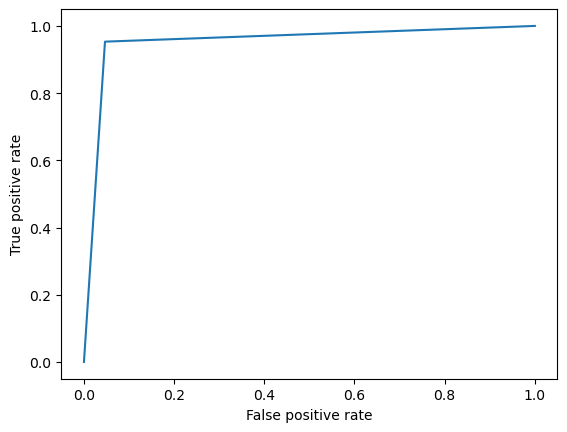

In [65]:
# AUC-ROC CURVE
fpr,tpr,thresholds = roc_curve(y_sam_test,XGB_pred)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr,tpr)
print('AUC score:',roc_auc_score(y_sam_test,XGB_pred))

# SUPPORT VECTOR MACHINE (SVM)

In [66]:
# Fitting the model
SVM = LinearSVC()
SVM.fit(x_sam_train,y_sam_train)

LinearSVC()

In [67]:
# Model Evaluation
SVM_pred = SVM.predict(x_sam_test)
print("Training score:",SVM.score(x_sam_train,y_sam_train))
print("Accuracy score:",accuracy_score(y_sam_test,SVM_pred))

Training score: 0.8772335355064386
Accuracy score: 0.8755484642999601


In [68]:
# Confusion matrix and classification report
print('Confusion matrix:\n',confusion_matrix(y_sam_test,SVM_pred))
print('Classification report:\n ',classification_report(y_sam_test,SVM_pred))

Confusion matrix:
 [[14203  2190]
 [ 1866 14332]]
Classification report:
                precision    recall  f1-score   support

           0       0.88      0.87      0.88     16393
           1       0.87      0.88      0.88     16198

    accuracy                           0.88     32591
   macro avg       0.88      0.88      0.88     32591
weighted avg       0.88      0.88      0.88     32591



AUC score: 0.8756034928191856


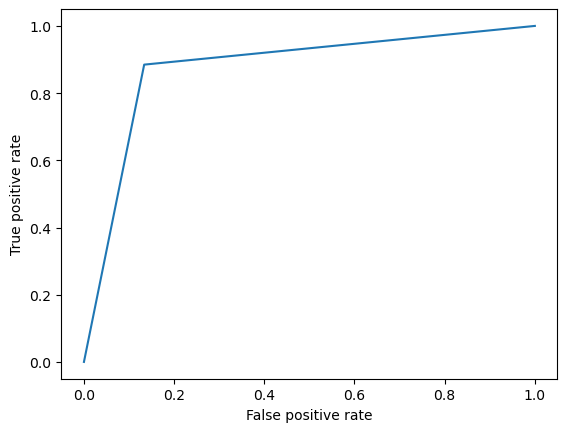

In [69]:
# AUC-ROC CURVE
fpr,tpr,thresholds = roc_curve(y_sam_test,SVM_pred)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr,tpr)
print('AUC score:',roc_auc_score(y_sam_test,SVM_pred))

# Model Comparison

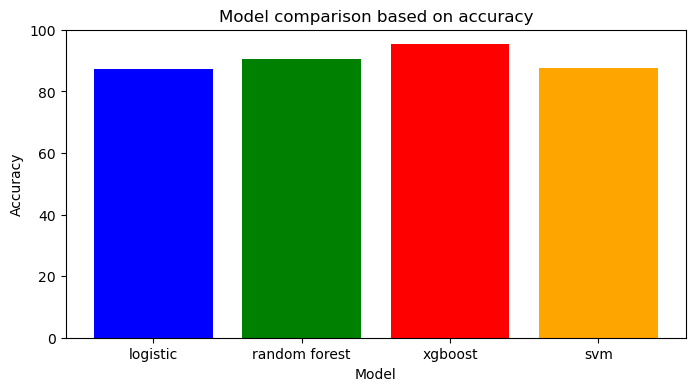

In [70]:
X = ['logistic','random forest','xgboost','svm'] # models 
Y = [87.4,90.4,95.3,87.5] # accuracy score
plt.figure(figsize=(8,4))
plt.bar(X,Y,color=['blue','green','red','orange'])
plt.title('Model comparison based on accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Conclusion

# After using multiple algorithms for diabetes prediction, it is observed that "XGBoost" is the best algorithm for prediction since it has an accuracy of 95%, has low false negative count and an AUC score of 95%.

# Feature Importance

In [71]:
XGB.feature_importances_

array([0.10598306, 0.02333395, 0.01166735, 0.03799688, 0.17584425,
       0.06714448, 0.3181625 , 0.25986752], dtype=float32)

<Axes: >

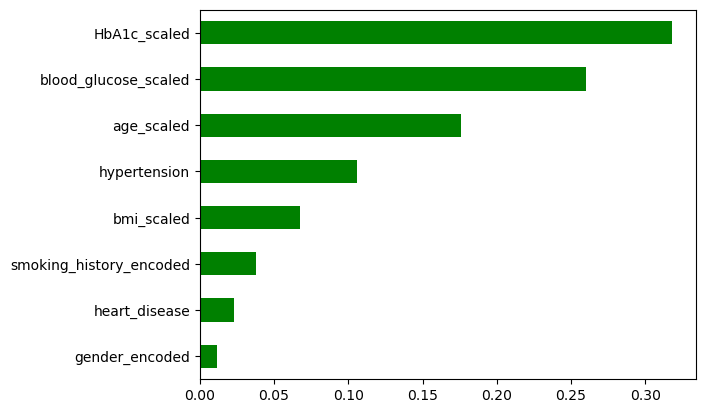

In [72]:
pd.Series(XGB.feature_importances_, index=x.columns).nsmallest(8).plot(kind='barh',color='green')

# From the above graph,it is clearly visible that HbA1c_level is the most important feature in this dataset. But we will also consider blood_glucose_level along with HbA1c_level as an important feature of the dataset.

In [102]:
# Sample Prediction
values = np.array([[0,65,0,1,2,28.30,6.8,195]])
scaled_age = scaler_age.transform(sample_data[:, [4]])
scaled_bmi = scaler_bmi.transform(sample_data[:, [5]])
scaled_HbA1c = scaler_HbA1c.transform(sample_data[:, [6]])
scaled_blood_glucose = scaler_blood_glucose.transform(sample_data[:, [7]])
scaled_sample_data = np.copy(sample_data)
scaled_sample_data[:, [4]] = scaled_age
scaled_sample_data[:, [5]] = scaled_bmi
scaled_sample_data[:, [6]] = scaled_HbA1c
scaled_sample_data[:, [7]] = scaled_blood_glucose]
predict = XGB.predict(scaled_sample_data)
print(predict)
if predict[0] == 0:
    print('non diabetic')
else:
    print('diabetic')

[1]
diabetic
